In [ ]:
import tensorflow as tf
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import load_img



In [ ]:
lt = [cv2.ROTATE_180,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_90_CLOCKWISE]
def brightness(img):
    value = random.uniform(0.5, 2)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#assigning directory
import pathlib
import glob
directory=pathlib.Path("/content/drive/My Drive/students")

In [ ]:
resultant="/content/augmentedimages"

In [ ]:
items = os.listdir(directory)

classes=[]
count=0
images = []
labels=[]
for i in items:
    i1 = 0
    print(i)
    classes.append(i)
    path1 = f"{directory}/{i}"
    a = random.randint(5,10)
    img = cv2.imread(path1)
    img = cv2.resize(img,(224,224))
    k = i.split(".")[0]
    cv2.imwrite(f"{resultant}\{k}{i1}.jpg",img)

    i1+=1
    while a!=0:
        img = cv2.rotate(img,lt[random.randint(0,2)])
        images.append(img)
        cv2.imwrite(f"{resultant}\{k}{i1}.jpg",img)
        i1+=1
        labels.append(count)
        if a%2==0:
            img = brightness(img)
            images.append(img)
            cv2.imwrite(f"{resultant}\{k}{i1}.jpg",img)
            i1+=1
            labels.append(count)
        a-=1
    count+=1
images = np.array(images)
labels = np.array(labels)

umesh.jpg
kalyan.jpg
Aakash.jpg
Gymson.jpg
badri.jpg
simha.jpg
nikhil.jpg


In [ ]:
images.shape

(84, 224, 224, 3)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, Flatten, Dense, MaxPooling2D,AveragePooling2D
from tensorflow.keras.models import *
from tensorflow.keras.applications import ResNet101

In [ ]:
resnet = ResNet101(weights="imagenet",include_top=True)

179648224/179648224 [==============================] - 2s 0us/step


In [ ]:
resnet.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [ ]:
len(resnet.layers)

347

In [ ]:
model1 = Model(inputs=resnet.input,
                           outputs=resnet.layers[60].output)


x = Flatten()(model1.output)
x = Dense(1024,activation="relu")(x)
x = Dense(512,activation="relu")(x)
x = Dense(12,activation="Softmax")(x)

model = Model(inputs = model1.input, outputs = x)

In [ ]:
len(model.layers)

65

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print("call")
        if(logs.get('accuracy') > .99):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(99))
            self.model.stop_training = True
callbacks = myCallback()

In [ ]:
# model1.summary()
model.compile(optimizer="Adadelta",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(images,labels,epochs=100,callbacks=[callbacks])

Epoch 1/100
3/3 [==============================] - 28s 809ms/step - loss: 2.5497 - accuracy: 0.2976
Epoch 2/100
3/3 [==============================] - 1s 196ms/step - loss: 0.4361 - accuracy: 0.9524
Epoch 3/100
3/3 [==============================] - ETA: 0s - loss: 0.1230 - accuracy: 1.0000call

Reached 99.00% accuracy, so stopping training!!
3/3 [==============================] - 1s 200ms/step - loss: 0.1230 - accuracy: 1.0000


In [ ]:
model.evaluate(images,labels)

3/3 [==============================] - 1s 51ms/step - loss: 0.3200 - accuracy: 0.9524


[0.31995218992233276, 0.9523809552192688]

In [ ]:
def predict(i,model,labels):
    path1 = f"{directory}/{i}"
    img = cv2.imread(path1)
    img = cv2.resize(img,(224,224))
    a = np.argmax(model.predict(np.array([img])))
    img = cv2.putText(img, labels[a], (25,25), cv2.FONT_HERSHEY_SIMPLEX,1, (225,225,0), 3, cv2.LINE_AA)
    plt.imshow(img)

1/1 [==============================] - 1s 766ms/step


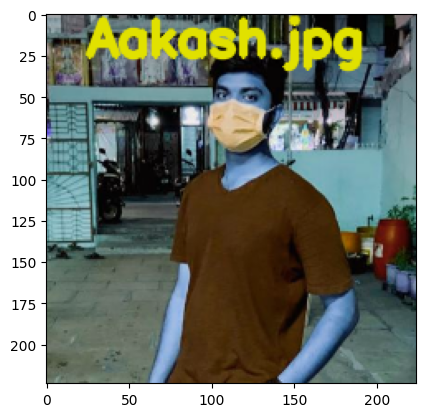

In [ ]:
predict("Aakash.jpg",model,classes)